# **一、数据降维**

## **1、简单介绍**  
机器学习领域中所谓降维就是指采用某种映射方法，将原高维空间中的数据点映射到低维度的空间中。降维的本质是学习一个映射函数$f:x\rightarrow{y}$，其中x是原始数据点的表达，目前最多使用向量表达式。y是数据点映射后的低维向量表达，通常y的维度小于x的维度。f可能是显式的或隐式的、线性的或非线性的。 

目前大部分降维算法处理向量表达的数据，也有一些降维算法处理高阶张量表达的数据。之所以使用降维后的数据表示是因为在原始的高维空间中，包含有冗余信息以及噪音信息，在实际应用例如图像识别中造成了误差，降低了准确率；而通过降维,我们希望减少冗余信息所造成的误差,提高识别（或其他应用）的精度。又或者希望通过降维算法来寻找数据内部的本质结构特征。

在很多算法中，降维算法成为了数据预处理的一部分，如PCA。事实上，有一些算法如果没有降维预处理，其实是很难得到很好的效果的。

## **2、降维的分类**  
降维方法分为线性和非线性，非线性降维又分为基于核函数和基于特征值的方法。  
（1）线性降维：PCA，ICA，LDA，LFA、LPP等  
（2）非线性降维：①基于核函数的方法：KPCA，KICA，KDA等 ②基于特征值的方法：ISOMAP、LLE、LE、LPP、LTSA、MVU等 

可以将其分类方式表示为下图所示：

<div align=center><img src="./image/数据降维.png"  div align=center /></div>

## **3、降维的作用**  
（1）降低时间复杂度和空间复杂度   
（2）节省了提取不必要特征的开销   
（3）去掉数据集中夹杂的噪音   
（4）较简单的模型在小数据集上有更强的鲁棒性   
（5）当数据能有较少的特征进行解释，我们可以更好地解释数据，从而更好地提取知识   
（6）实现数据的可视化 

## **4、降维的目的**  
一般来说降维的目的是用来进行特征选择和特征提取。   
（1）特征选择：选择重要的特征子集，删除其余特征   
（2）特征提取：由原始特征形成的较少的新特征  
在特征提取中，我们要找到k个新的维度的集合，这些维度是原来维度的组合，这个方法可以是监督的，也可以是非监督的，如PCA是非监督的，LDA是监督的。

**经过以上的介绍，我们已经大致了解了什么是降维技术，接下就介绍几个常用的具体的降维方法**

# **二、主成分分析算法（PCA）**

PCA（Principal Component Analysis）是一种常用的数据分析方法。PCA通过线性变换将原始数据变换为一组各维度线性无关的表示，可用于提取数据的主要特征分量，常用于高维数据的降维。通俗讲就是将高维度数据变为低维度。例如基于电商的用户数据可能有上亿维，我们可以采用PCA把维度从亿级别降低到万级别或千级别，从而提高计算效率。

## **1、PCA原理**

**首先先补充一些基本的数学知识**

### **(1) 数据的向量表示及降维问题**  
一般情况下，在数据挖掘和机器学习中，数据被表示为向量。例如某个淘宝店2012年全年的流量及交易情况可以看成一组记录的集合，其中每一天的数据是一条记录，格式如下：

(日期, 浏览量, 访客数, 下单数, 成交数, 成交金额)  
其中“日期”是一个记录标志而非度量值，而数据挖掘关心的大多是度量值，因此如果我们忽略日期这个字段后，我们得到一组记录，每条记录可以被表示为一个五维向量，其中一条看起来大约是这个样子：
$$\left(500,240,25,13,2312,15\right)^T$$
注意这里用了转置，因为习惯上使用列向量表示一条记录（后面会看到原因），后面也会遵循这个准则。不过为了方便有时会省略转置符号，但我们说到向量默认都是指列向量。  

我们当然可以对这一组五维向量进行分析和挖掘，不过我们知道，很多机器学习算法的复杂度和数据的维数有着密切关系，甚至与维数呈指数级关联。当然，这里区区五维的数据，也许还无所谓，但是实际机器学习中处理成千上万甚至几十万维的情况也并不罕见，在这种情况下，机器学习的资源消耗是不可接受的，因此我们必须对数据进行降维。  

降维当然意味着信息的丢失，不过鉴于实际数据本身常常存在的相关性，我们可以想办法在降维的同时将信息的损失尽量降低。

举个例子，假如某学籍数据有两列M和F，其中M列的取值是如果此学生为男性取值1，为女性取值0；而F列是学生为女性取值1，男性取值0。此时如果我们统计全部学籍数据，会发现对于任何一条记录来说，当M为1时F必定为0，反之当M为0时F必定为1。在这种情况下，我们将M或F去掉实际上没有任何信息的损失，因为只要保留一列就可以完全还原另一列。  

当然上面是一个极端的情况，在现实中也许不会出现，不过类似的情况还是很常见的。例如上面淘宝店铺的数据，从经验我们可以知道，“浏览量”和“访客数”往往具有较强的相关关系，而“下单数”和“成交数”也具有较强的相关关系。这里我们非正式的使用“相关关系”这个词，可以直观理解为“当某一天这个店铺的浏览量较高（或较低）时，我们应该很大程度上认为这天的访客数也较高（或较低）”。后面我们会给出相关性的严格数学定义。  

这种情况表明，如果我们删除浏览量或访客数其中一个指标，并不会有太多信息被丢失。因此我们可以删除一个，以降低机器学习算法的复杂度。  

上面给出的是降维的朴素思想描述，可以有助于直观理解降维的动机和可行性，但并不具有操作指导意义。例如，我们到底删除哪一列损失的信息才最小？亦或根本不是单纯删除几列，而是通过某些变换将原始数据变为更少的列但又使得丢失的信息最小？到底如何度量丢失信息的多少？如何根据原始数据决定具体的降维操作步骤？

### **（2）向量的表示及基变换**  
既然我们面对的数据被抽象为一组向量，那么下面有必要研究一些向量的数学性质，而这些数学性质将成为后续导出PCA的理论基础。

### **（3） 内积与投影**  
下面先来看一个高中就学过的向量运算：内积。两个维数相同的向量的内积被定义为：
$${\left(a_1,a_2,...,a_n\right)}^T\cdot{\left(b_1,b_2,...,b_n\right)}^T=a_1b_1+a_2b_2+...+a_nb_n$$
内积运算将两个向量映射为一个实数。其计算方式非常容易理解，但是其意义并不明显。下面我们分析内积的几何意义。假设A和B是两个n维向量，我们知道n维向量可以等价表示为n维空间中的一条从原点发射的有向线段，为了简单起见我们假设A和B均为二维向量，则
$A=\left(x_1,y_2\right),B=\left(x_2,y_2\right)$。则在二维平面上A和B可以用两条发自原点的有向线段表示，如下图所示：

<div align=center><img src="./image/內积.png" width = "300" height = "300" div align=center /></div>

内积的另一种我们熟悉的表述方法为向量的模乘上向量之间的夹角的余弦值，即：
$$A\cdot B=\left|A\right|\left|B\right|\cos\alpha$$
如果我们假设B的模为1，即单位向量，那么：
$$A\cdot B=\left|A\right|\cos\alpha$$
这里我们可以发现，**内积其实就是A向量在B向量的方向上的投影的长度**。这就是内积的一种几何解释，也是我们得到的第一个重要结论。在后面的推导中，将反复使用这个结论。


### **（4）基**  
一个二维向量可以对应二维笛卡尔直角坐标系中从原点出发的一个有向线段。例如下面这个向量：

<div align=center><img src="./image/基.png" width = "300" height = "300" div align=center /></div>

在代数表示方面，我们经常用线段终点的点坐标表示向量，例如上面的向量可以表示为(3,2)，这是我们再熟悉不过的向量表示。


不过只有一个坐标本身是不能够精确表示一个向量的。这里的3实际表示的是向量在x轴上的投影值是3，在y轴上的投影值是2。也就是说我们其实隐式引入了一个定义：以x轴和y轴上正方向长度为1的向量为标准。那么一个向量实际是说在x轴投影为3而y轴的投影为2。注意投影是一个矢量，所以可以为负。


更正式的说，向量(x,y)实际上表示线性组合：  
$x{\left(1,0\right)}^T+y{\left(0,1\right)}^T$  


不难证明所有二维向量都可以表示为这样的线性组合。此处(1,0)和(0,1)叫做二维空间中的一组基。

<div align=center><img src="./image/基2.png" width = "300" height = "300" div align=center /></div>

**所以，要准确描述向量，首先要确定一组基，然后给出在基所在的各个直线上的投影值**，就可以了。只不过我们经常省略第一步，而默认以(1,0)和(0,1)为基。  


我们之所以默认选择(1,0)和(0,1)为基，当然是比较方便，因为它们分别是x和y轴正方向上的单位向量，因此就使得二维平面上点坐标和向量一一对应，非常方便。但实际上任何两个线性无关的二维向量都可以成为一组基，所谓线性无关在二维平面内可以直观认为是两个不在一条直线上的向量。例如，(1,1)和(-1,1)也可以成为一组基。一般来说，我们希望基的模是1，因为从内积的意义可以看到，如果基的模是1，那么就可以方便的用向量点乘基而直接获得其在新基上的坐标了！实际上，对应任何一个向量我们总可以找到其同方向上模为1的向量，只要让两个分量分别除以模就好了。例如，上面的基可以变为$\left(\frac{1}{\sqrt2},\frac{1}{\sqrt2}\right)和\left(-\frac{1}{\sqrt2},\frac{1}{\sqrt2}\right)$  


现在，我们想获得(3,2)在新基上的坐标，即在两个方向上的投影矢量值，那么根据内积的几何意义，我们只要分别计算(3,2)和两个基的内积，不难得到新的坐标为$\left(\frac{5}{\sqrt2},-\frac{1}{\sqrt2}\right)$。如下图所示：

<div align=center><img src="./image/基3.png" width = "300" height = "300" div align=center /></div>

另外这里要注意的是，列举的例子中基是正交的（即内积为0，或直观说相互垂直），但可以成为一组基的唯一要求就是线性无关，非正交的基也是可以的。不过因为正交基有较好的性质，所以一般使用的基都是正交的。

### **（5）基变换的矩阵表示**   
我们找一种简便的方式来表示基变换。还是拿上面的例子，想一下，将(3,2)变换为新基上的坐标，就是用(3,2)与第一个基做内积运算，作为第一个新的坐标分量，然后用(3,2)与第二个基做内积运算，作为第二个新坐标的分量。实际上，我们可以用矩阵相乘的形式简洁的表示这个变换：
$$\begin{pmatrix}
1/\sqrt{2} & 1/\sqrt{2} \\
-1/\sqrt{2}& 1/\sqrt{2}
\end{pmatrix}  
\begin{pmatrix}
1 & 2 & 3 \\
1 & 2 & 3 \\
\end{pmatrix}
=
\begin{pmatrix}
2/\sqrt{2} & 4/\sqrt{2} & 6/\sqrt{2} \\
0 & 0 & 0
\end{pmatrix}$$

一般的，如果我们有M个N维向量，想将其变换为由R个N维向量表示的新空间中，那么首先将R个基按行组成矩阵A，然后将向量按列组成矩阵B，那么两矩阵的乘积AB就是变换结果，其中AB的第m列为A中第m列变换后的结果。

<div align=center><img src="./image/基变换.png"  div align=center /></div>


其中$p_i$是一个行向量，表示第i个基， $a_j$是一个列向量，表示第j个原始数据记录。   

要注意的是，这里R可以小于N，而R决定了变换后数据的维数。也就是说，我们可以将一N维数据变换到更低维度的空间中去，变换后的维度取决于基的数量。因此这种矩阵相乘的表示也可以表示降维变换。  

最后，上述分析同时给矩阵相乘找到了一种物理解释：两个矩阵相乘的意义是将右边矩阵中的每一列列向量变换到左边矩阵中每一行行向量为基所表示的空间中去。更抽象的说，一个矩阵可以表示一种线性变换。


### **（6）协方差矩阵及优化目标**  
上面我们讨论了选择不同的基可以对同样一组数据给出不同的表示，而且如果基的数量少于向量本身的维数，则可以达到降维的效果。但是我们还没有回答一个最最关键的问题：如何选择基才是最优的。或者说，如果我们有一组N维向量，现在要将其降到K维（K小于N），那么我们应该如何选择K个基才能最大程度保留原有的信息？  

我们仍以一个具体的例子展开。假设我们的数据由五条记录组成，将它们表示成矩阵形式：
$$\begin{pmatrix}
1 & 1 & 2 & 4 & 2 \\
1 & 3 & 3 & 4 & 4
\end{pmatrix}$$
其中每一列为一条数据记录，而一行为一个字段。为了后续处理方便，我们首先将每个字段内所有值都减去字段均值，其结果是将每个字段都变为均值为0（这样做的道理和好处后面会看到）。

我们看上面的数据，第一个字段均值为2，第二个字段均值为3，所以变换后：
$$\begin{pmatrix}
-1 & -1 & 0 & 2 & 0 \\
-2 & 0 & 0 & 1 & 1
\end{pmatrix}$$
我们可以看下五条数据在平面直角坐标系内的样子：

<div align=center><img src="./image/协方差点.png" width = "300" height = "300" div align=center /></div>

现在问题来了：如果我们必须使用一维来表示这些数据，又希望尽量保留原始的信息，你要如何选择？  

通过上一节对基变换的讨论我们知道，这个问题实际上是要在二维平面中选择一个方向，将所有数据都投影到这个方向所在直线上，用投影值表示原始记录。这是一个实际的二维降到一维的问题。  

那么如何选择这个方向（或者说基）才能尽量保留最多的原始信息呢？一种直观的看法是：希望投影后的投影值尽可能分散。  

以上图为例，可以看出如果向x轴投影，那么最左边的两个点会重叠在一起，中间的两个点也会重叠在一起，于是本身四个各不相同的二维点投影后只剩下两个不同的值了，这是一种严重的信息丢失，同理，如果向y轴投影最上面的两个点和分布在x轴上的两个点也会重叠。所以看来x和y轴都不是最好的投影选择。我们直观目测，如果向通过第一象限和第三象限的斜线投影，则五个点在投影后还是可以区分的。

### **（7）方差**  
我们希望投影后投影值尽可能分散，而这种分散程度，可以用数学上的方差来表述。此处，一个字段的方差可以看做是每个元素与字段均值的差的平方和的均值，即：
$$Var\left(a\right)=\frac{1}{m}\sum_{i=1}^{m}{\left(a_i-\mu\right)}^2$$
由于上面我们已经将每个字段的均值都化为0了，因此方差可以直接用每个元素的平方和除以元素个数表示：
$$Var\left(a\right)=\frac{1}{m}\sum_{i=1}^{m}{a_i}^2$$
于是上面的问题被形式化表述为：寻找一个一维基，使得所有数据变换为这个基上的坐标表示后，方差值最大。


### **（8）协方差**  
对于上面二维降成一维的问题来说，找到那个使得方差最大的方向就可以了。不过对于更高维，还有一个问题需要解决。考虑三维降到二维问题。与之前相同，首先我们希望找到一个方向使得投影后方差最大，这样就完成了第一个方向的选择，继而我们选择第二个投影方向。  


如果我们还是单纯只选择方差最大的方向，很明显，这个方向与第一个方向应该是“几乎重合在一起”，显然这样的维度是没有用的，因此，应该有其他约束条件。从直观上说，让两个字段尽可能表示更多的原始信息，我们是不希望它们之间存在（线性）相关性的，因为相关性意味着两个字段不是完全独立，必然存在重复表示的信息。

数学上可以用两个字段的协方差表示其相关性，由于已经让每个字段均值为0，则：
$$Cov\left(a,b\right)=\frac{1}{m}\sum_{i=1}^{m}a_ib_i$$
可以看到，在字段均值为0的情况下，两个字段的协方差简洁的表示为其内积除以元素数m。  


当协方差为0时，表示两个字段完全独立。为了让协方差为0，我们选择第二个基时只能在与第一个基正交的方向上选择。因此最终选择的两个方向一定是正交的。  



**至此，我们得到了降维问题的优化目标：将一组N维向量降为K维（K大于0，小于N），其目标是选择K个单位（模为1）正交基，使得原始数据变换到这组基上后，各字段两两间协方差为0，而字段的方差则尽可能大（在正交的约束下，取最大的K个方差）。**


### **（9）协方差矩阵**  
上面我们导出了优化目标，但是这个目标似乎不能直接作为操作指南（或者说算法），因为它只说要什么，但根本没有说怎么做。所以我们要继续在数学上研究计算方案。  

我们看到，最终要达到的目的与字段内方差及字段间协方差有密切关系。因此我们希望能将两者统一表示，仔细观察发现，两者均可以表示为内积的形式，而内积又与矩阵相乘密切相关。于是我们来了灵感：


假设我们只有a和b两个字段，那么我们将它们按行组成矩阵X：  
$$X=\begin{pmatrix}
a_1 & a_2 & \ldots & a_m \\
b_1 & b_2 & \ldots & b_m 
\end{pmatrix}$$
然后我们用X乘以X的转置，并乘上系数1/m：


$$\frac{1}{m}XX^T=\begin{pmatrix}
\frac{1}{m}\sum_{i=1}^{m}{a_i}^2 & \frac{1}{m}\sum_{i=1}^{m}a_ib_i \\
\frac{1}{m}\sum_{i=1}^{m}a_ib_i & \frac{1}{m}\sum_{i=1}^{m}{b_i}^2
\end{pmatrix}$$
这个矩阵对角线上的两个元素分别是两个字段的方差，而其它元素是a和b的协方差。两者被统一到了一个矩阵内。  

根据矩阵相乘的运算法则，这个结论很容易被推广到一般情况：
设我们有m个n维数据记录，将其按列排成n乘m的矩阵X，设C=$\frac{1}{m}XX^T$，则C是一个对称矩阵，其对角线分别是各个字段的方差，而第i行j列与j行i列元素相同，表示i和j两个字段的方差。


### **（10）协方差矩阵对角化**  
根据上述推导，我们发现要达到优化目前，等价于将协方差矩阵对角化：即除对角线外的其它元素化为0，并且在对角线上将元素按大小从上到下排列，这样我们就达到了优化目的。这样说可能还不是很明晰，我们进一步看下原矩阵与基变换后矩阵协方差矩阵的关系：  

设原始数据矩阵X对应的协方差矩阵为C，而P是一组基按行组成的矩阵，设Y=PX，则Y为X对P做基变换后的数据。设Y的协方差矩阵为D，我们推导一下D与C的关系：
\begin{equation}
\begin{aligned}
D&=\frac{1}{m}YY^T\\
&=\frac{1}{m}\left(PX\right){\left(PX\right)}^T\\
&=\frac{1}{m}PXX^TP^T\\
&=P\left(\frac{1}{m}XX^T\right)P^T\\
&=PCP^T
\end{aligned}
\end{equation}
我们要找的P不是别的，正是能让原始协方差矩阵对角化的P。换句话说，优化目标变成了寻找一个矩阵P，满足$PCP^T$是一个对角矩阵，并且对角元素按从大到小依次排列，那么P的前K行就是要寻找的基，用P的前K行组成的矩阵乘以X就使得X从N维降到了K维并满足上述优化条件。  

由上文知道，协方差矩阵C是一个是对称矩阵，在线性代数上，实对称矩阵有一系列非常好的性质：
1）实对称矩阵不同特征值对应的特征向量必然正交。
2）设特征向量$\lambda$重数为r,则必然存在r个线性无关的特征向量对应于$\lambda$，因此可以将这r个特征向量单位正交化。  

由上面两条可知，一个n行n列的实对称矩阵一定可以找到n个单位正交特征向量，设这n个特征向量为$e_1,e_2,\ldots,e_n$，我们将其按列组成矩阵：
$$E=\left(e_1  e_2  \ldots  e_n\right)$$
则对协方差矩阵C有如下结论：

<div align=center><img src="./image/协方差.png"  div align=center /></div>

其中$\Lambda$为对角矩阵，其对角元素为各特征向量对应的特征值（可能有重复）**以上内容不给出数学证明，如果有兴趣可以查看相应的资料**  

到这里，我们发现我们已经找到了需要的矩阵P：$P=E^T$
，P是协方差矩阵的特征向量单位化后按行排列出的矩阵，其中每一行都是C的一个特征向量。如果设P按照$\Lambda$中特征值从大到小，将特征向量从上到下排列，则用P的前K行组成的矩阵乘以原始数据矩阵X，就得到了我们需要降维后的数据矩阵Y。  

至此我们完成了整个PCA的数学原理讨论。


### **（11）算法及其实例**  
  **PCA算法**  
  
总结一下PCA的算法步骤：  
设有m条n维数据。  
1）将原始数据按列组成n行m列矩阵X  
2）将X的每一行（代表一个属性字段）进行零均值化，即减去这一行的均值  
3）求出协方差矩阵$C=\frac{1}{m}XX^T$  
4）求出协方差矩阵的特征值及对应的特征向量  
5）将特征向量按对应特征值大小从上到下按行排列成矩阵，取前k行组成矩阵P  
6）Y=PX即为降维到k维后的数据


**实例**  
以上文提到的  

$$\begin{pmatrix}
-1 & -1 & 0 & 2 & 0 \\
-2 & 0 & 0 & 1 & 1
\end{pmatrix}$$



为例，我们用PCA方法将这组二维数据降到一维。  
因为这个矩阵的每行已经是零均值，这里我们直接求协方差矩阵：
$$C=\frac{1}{5}
\begin{pmatrix}
-1 & -1 & 0 & 2 & 0\\
-2 & 0 & 0 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
-1 & -2 \\
-1 & 0 \\
0 & 0\\
2 & 1\\
0 & 1\\
\end{pmatrix}
=
\begin{pmatrix}
\frac{6}{5} & \frac{4}{5}\\
\frac{4}{5} & \frac{6}{5}
\end{pmatrix}
$$
然后求其特征值和特征向量，具体求解方法不再详述，可以参考相关资料。求解后特征值为：  $\lambda_1=2,\lambda_2=\frac{2}{5}$

其对应的特征向量分别为:  

$$c_1\begin{pmatrix} 1 \\ 1 \end{pmatrix} ,c_2  \begin{pmatrix} -1\\ 1 \end{pmatrix}$$  
其中对应的特征向量分别是一个通解，$c_1和c_2$可取任意实数。那么标准化后的特征向量为：  

$$\begin{pmatrix} 1/{\sqrt{2}}\\ 1/{\sqrt2}\end{pmatrix},\begin{pmatrix} -1/{\sqrt{2}}\\ 1/{\sqrt2}\end{pmatrix}$$  
因此我们的矩阵P是：
$$P=\begin{pmatrix} 1/\sqrt2 & 1/\sqrt2 \\ -1/\sqrt2 & 1/\sqrt2 \end{pmatrix}$$
可以验证协方差矩阵的C的对角化:  
$$PCP^T=\begin{pmatrix} 1/\sqrt2 & 1/\sqrt2 \\ -1/\sqrt2 & 1/\sqrt2 \end{pmatrix} 
\begin{pmatrix}
\frac{6}{5} & \frac{4}{5}\\
\frac{4}{5} & \frac{6}{5}
\end{pmatrix}
\begin{pmatrix} 1/\sqrt2 & -1/\sqrt2 \\ 1/\sqrt2 & 1/\sqrt2 \end{pmatrix} = 
\begin{pmatrix} 2 & 0 \\ 0 & 2/5 \end{pmatrix}$$
最后我们用P的第一行乘以数据矩阵，就得到了降维后的表示：  
$$Y=\begin{pmatrix} 1/\sqrt2 & 1/\sqrt2 \end{pmatrix} \begin{pmatrix} -1 & -1 & 0 & 2 & 0 \\ -2 & 0 & 0 & 1 & 1 \end{pmatrix}
=\begin{pmatrix} -3/\sqrt2 & -1/\sqrt2 & 0 & 3/\sqrt2 & -1/\sqrt2 \end{pmatrix}$$
降维投影结果如下图：

<div align=center><img src="./image/实例.png" width = "300" height = "300" div align=center /></div>


## **2、PCA实现**
**完成了以上内容的学习，现在我们就来简单实现下PCA**

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**参照上面(11)小节中的PCA算法**

有m条n维数据。  
1）将原始数据按列组成n行m列矩阵X  
2）将X的每一行（代表一个属性字段）进行零均值化，即减去这一行的均值  
3）求出协方差矩阵$C=\frac{1}{m}XX^T$  
4）求出协方差矩阵的特征值及对应的特征向量  
5）将特征向量按对应特征值大小从上到下按行排列成矩阵，取前k行组成矩阵P  
6）Y=PX即为降维到k维后的数据

In [104]:
def pca(XMat,k):
    '''
    输入:原始数据XMat,需要降成的维度k
    输出:降维得到的低维度矩阵finalMatrix,降维后又还原得到的矩阵reconMatrix
    '''
    #有150条4维的原始数据，组成4行150列的矩阵XMatT
    XMatT = XMat.T 

    ######################                              
    ### START THE CODE ###
    '''
    将XMatT的每一行进行零均值化,记得保留记录每一行均值的avgs
    用np.cov()计算出零均值化后的矩阵的协方差矩阵
    用np.linalg.eig()求解协方差矩阵的特征值和特征向量
    用np.argsort()将特征向量组按照特征值从大到小排序,注意要将特征向量按行排列
    取特征值前k大的特征向量,组成矩阵selectVec
    用np.dot()将selectVec和零均值化后的矩阵相乘得到降维后的矩阵finalMatrix
    '''
    avgs = np.mean(XMatT,axis=1)
    avgs = avgs.reshape(4,1)
    XMatT = XMatT-avgs
    covMatrix = np.cov(XMatT)
    eigVals,eigVects = np.linalg.eig(covMatrix)
    eigValIndice = np.argsort(eigVals)
    eigValIndice = eigValIndice[:-(k+1):-1]
    selectVec = eigVects[:,eigValIndice]
    # 特征向量按行排列
    selectVec = selectVec.T 
    finalMatrix = np.dot(selectVec, XMatT)
    ### END THE CODE ###
    ######################

    #降维后又还原得到的数据
    reconMatrix = np.dot(selectVec.T,finalMatrix)+avgs    
    return finalMatrix,reconMatrix

采用PCA，将原始数据从4维降到2维

In [105]:
XMat = np.array(pd.read_csv("data.txt",sep="\t",header=None))
finalData,reconData = pca(XMat,2)
print(reconData.shape)
print(finalData.shape)

(4, 150)
(2, 150)


可视化原始数据和还原数据中的两维

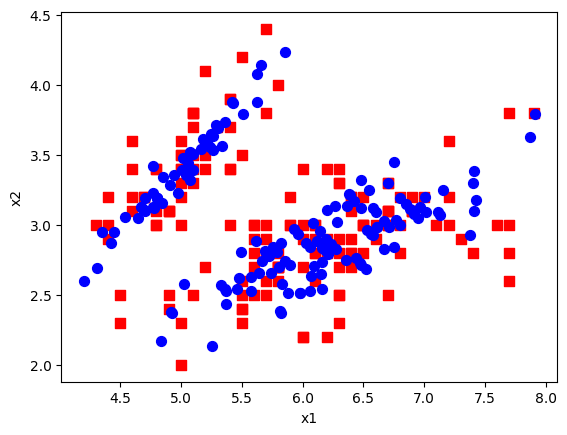

In [106]:
def plotBestFit(data1, data2): 
    dataArr1 = np.array(data1)
    dataArr2 = np.array(data2)
    m = np.shape(dataArr1)[0]
    axis_x1 = []
    axis_y1 = []
    axis_x2 = []
    axis_y2 = []
    for i in range(m):
        axis_x1.append(dataArr1[i,0])
        axis_y1.append(dataArr1[i,1])
        axis_x2.append(dataArr2[0,i]) 
        axis_y2.append(dataArr2[1,i])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')
    ax.scatter(axis_x2, axis_y2, s=50, c='blue')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

plotBestFit(XMat,reconData)

若程序正确运行，应该可以得到类似下图所示的数据分布图，红色是原始数据(前两维)，蓝色是降维后又还原得到的数据。

<div align=center><img src="./image/pca_result.png"  div align=center /></div>

可视化两个维度的原始数据和将PCA降维后再还原的数据，可以发现降维后的数据相较原始数据信息有一定的损失，但还是基本保留了原始数据的大致分布情况

# **三、SVD（奇异值分解）**  
### **（1）简介**  
SVD 全称：Singular Value Decomposition。SVD 是一种提取信息的强大工具，它提供了一种非常便捷的矩阵分解方式，能够发现数据中十分有意思的潜在模式。  

主要应用领域包括：

隐性语义分析 (Latent Semantic Analysis, LSA) 或隐性语义索引 (Latent Semantic Indexing, LSI)；  
推荐系统 (Recommender system)，可以说是最有价值的应用点；  
矩阵形式数据（主要是图像数据）的压缩。

### **（2）线性变换**  
在做 SVD 推导之前，先了解一下线性变换，以 $2\times 2$ 的线性变换矩阵为例，先看简单的对角矩阵：
$$M=\left [ \begin{matrix} 3 & 0 \\ 0 & 1 \end{matrix} \right]$$ 
从集合上讲，M是将二维平面上的点$\left(x,y\right)$经过线性变换到另一个点的变换矩阵，如下所示：
$$\left [ \begin{matrix} 3 & 0 \\ 0 & 1 \end{matrix} \right]  \left[ \begin{matrix} x \\ y \end{matrix} \right] = \left[ \begin{matrix} 3x \\ y \end{matrix}\right]$$
该变换的集合效果是，变换后的平面沿着x水平方向进行了3倍的拉伸，垂直方向没有发生变化。

### **（3）SVD推导**  
该部分的推导从几何层面上去理解二维的SVD，总体的思想是：借助 SVD 可以将一个相互垂直的网格 (orthogonal grid) 变换到另外一个互相垂直的网格。

可以通过二维空间中的向量来描述这件事情。  
首先，选择两个互相正交的单位向量$\nu_1$和$\nu_2$(也可称为一组正交基)。M是一个变换矩阵。  
向量$M\nu_1,M\nu_2$也是一组正交向量（也就是$\nu_1$和$\nu_2$经过M变换得到的）。
$\mu_1,\mu_2$分别是$M\nu_1,M\nu_2$的单位向量(即另一组正交基)，且有：  
$$M\nu_1=\sigma_1\mu_1$$
$$M\nu_2=\sigma_2\mu_2$$
则$\sigma_1,\sigma_2$分别为$M\nu_1,M\nu_2$的模(也称作M的奇异值)。 

设任意向量x，有：  
$$x=\left(\nu_1\cdot x\right)\nu_1+\left(\nu_2\cdot x\right)\nu_2$$
例如，当$x=\left[ \begin{matrix} 3 \\ 2 \end{matrix} \right]时，x=\left( \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] \cdot\left[  \begin{matrix} 3 \\ 2 \end{matrix}\right]\right) \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] + \left( \left[ \begin{matrix} 0 \\ 1 \end{matrix} \right] \cdot\left[  \begin{matrix} 3 \\ 2 \end{matrix}\right]\right) \left[ \begin{matrix} 0 \\ 1 \end{matrix} \right] $  
那么，可得：
$$Mx=\left(\nu_1 \cdot x\right)M\nu_1+\left(\nu_2 \cdot x\right)M\nu_2$$
$$Mx=\left(\nu_1 \cdot x\right)\sigma_1\mu_1+\left(\nu_2 \cdot x\right)\sigma_2\mu_2$$
根据线性代数的知识，向量的内积可用向量的转置乘积来表示：  
$$\nu_1 \cdot x = \nu_1^Tx$$
则有：  
$$Mx=\nu_1^Tx\sigma_1\mu_1+\nu_2^Tx\sigma_2\mu_2$$
两边去掉x，（$\nu_1^Tx$结果是一个标量，可将其移到乘式的最右侧，之后再分别乘以$x^-1$）,得：  
$$M=\mu_1\sigma_1\nu_1^T+\mu_2\sigma_2\nu_2^T$$
将下标相同的向量合并起来，则该式可通用地表示为:
$$M=U\sum_{}^{}V^T$$

至此，SVD使用几何意义的形式推导完毕，其中：  
1）U矩阵的列向量分别是$\mu_1,\mu_2$   
2）$\sum_{}^{}$是一个对角矩阵，形如:$\left[ \begin{matrix} \sigma_1 & 0 \\ 0 & \sigma_2 \end{matrix} \right]$  
3）V矩阵的列向量分别是$\nu_1,\nu_2$

### **（4）关于SVD的一些重要的结论性总结**  
1）任意的矩阵M可以分解成三个矩阵  
2）V代表了原始域的标准正交基  
3）U表示经过M变换后的新标准正交基  
4）$\sum_{}^{} $表示了V中的向量与U中的相对应向量之间的比例（伸缩）关系  
5）$\sum_{}^{} $中的每个$\sigma$会按照从大到小排好顺序，值越大代表该维度重要性越高  
6）在利用 SVD 做数据信息提取或压缩时，往往依据一些启发式策略，如直接设定只提取$\sum_{}^{}$中的前 k 项，或者另一种较常用的做法是保留矩阵中一定百分比的能量信息，一般可设定为 90%，能量信息比例的计算可先求得所有奇异值平方总和，然后将奇异值的平方依次累加到总值的 90% 为止，形如：
$$k=\arg\min_{k}\frac{\sum_{i=0}^{k}{\sigma_i}^2}{\sum_{i=0}^{N}{\sigma_i}^2}\geq0.9$$

### **（5）SVD实战**

 **下面采用SVD进行灰度图像的压缩**

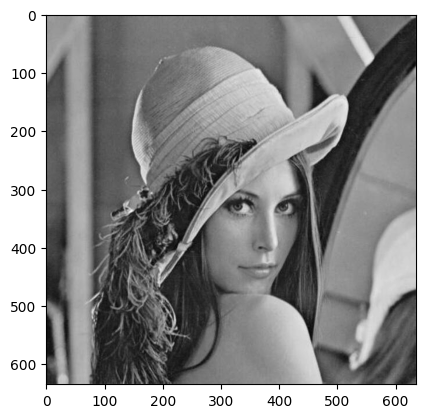

奇异总值: 266102.93454888195
达到90%时的奇异总值: 239492.64109399376
前 107 个奇异值的奇异总值: 239820.95624437483


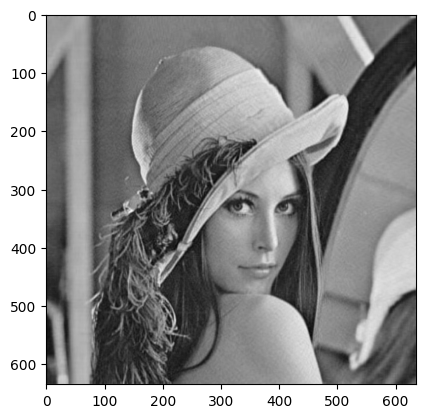

In [107]:
from PIL import Image
from numpy import mat, eye
import numpy as np
#打开图像
Im = Image.open('image/SVD_image.jpg').convert('L')
plt.imshow(Im, cmap="gray")
plt.show() 

'''进行奇异值分解'''
######################
### START THE CODE ###
'''用np.mat()得到待分解矩阵'''
data = np.mat(Im)
'''用np.linalg.svd(),进行奇异值分解,得到分解后的三个矩阵U,sigma,VT'''
U,sigma,VT = np.linalg.svd(data)
### END THE CODE ###
######################

'''在重构之前,选择达到90%能量度的奇异值'''
#简单起见，直接将求和的值作为奇异总值(sigma为对角矩阵)
cnt = sum(sigma)
print('奇异总值:',cnt)
#达到90%时的奇异总值
cnt90 = 0.9*cnt    
print('达到90%时的奇异总值:',cnt90)
######################
### START THE CODE ###
'''取前count个奇异值,使得它们的和达到了总和的90%'''
count = 0
cntN = 0
for i in range(len(sigma)):
	cntN += sigma[i]
	if cntN >= cnt90:
		count = i+1
		break
### END THE CODE ###
######################
print('前',count,'个奇异值的奇异总值:',cntN)
 
'''重构矩阵'''
######################
### START THE CODE ###
'''获得新的只有前count个奇异值的对角矩阵dig'''
dig = eye(count)
for i in range(count):
    dig[i,i] = sigma[i]    
'''重构得到压缩后的矩阵redata, U'=U[:,:count],VT'=VT[:count,:],  redata=U'*dig*(VT') '''
U_1 = U[:,:count]
VT_1 = VT[:count,:]
redata = U_1*dig*VT_1
### END THE CODE ###
######################

plt.imshow(redata,cmap='gray')
plt.show() 

可以看到，选取前count个奇异值点进行图片压缩，奇异总值达到原图90%的奇异总值，图片信息保留较全。

压缩前：数据存储量635x635

压缩后只需存取U'，VT'和奇异总值达到原图90%的前若干个奇异值

存储量大约降低了60%

# **四、LDA(线性判别分析)  二分类情况**    
LDA是一种监督学习的降维技术，也就是说它的数据集的每个样本是有类别输出的。LDA的基本思想：给定训练样例集，设法将样例投影到一条直线上，使得同类样例的投影点尽可能接近、异类样例的投影点中心尽可能远离。更简单的概括为一句话，就是 **“投影后类内方差最小，类间方差最大”**。  

可能还是有点抽象，我们先看看最简单的情况。假设我们有两类数据分为 “+”和“-”，如下图所示，这些数据特征是二维的，我们希望将这些数据投影到一维的一条直线，让每一种类别数据的投影点尽可能的接近，而“+”和“-”数据中心之间的距离尽可能的大。 

<div align=center><img src="./image/LDA1.png"  div align=center /></div>

我们将这个最佳的向量称为$\omega$, 那么样例x到方向向量$\omega$上的投影可以用下式来计算
$$y=\omega^Tx$$
当x是二维的，我们就是要找一条直线（方向为$\omega$）来做投影，然后寻找最能使样本点分离的直线。

接下来我们从定量的角度来找到这个最佳的$\omega$。  
给定数据集$D=\left \{ \left(x_i,y_i \right) \right\},y_i \in \left\{0,1\right\}$,令$N_i,X_i,\mu_i,{\sum_{}^{}}_i$分别表示第$i\in\left\{0,1\right\}$类示例的样本个数、样本集合、均值向量、协方差矩阵。  


$\mu_i$的表达式:$\mu_i=\frac{1}{N_i}\sum_{x\in X_i}^{}x\left(i=0,1\right)$  


${\sum_{}^{}}_i$的表达式：${\sum_{}^{}}_i=\sum_{x\in X_i}^{} \left(x-\mu_i\right){\left(x-\mu_i\right)}^T\left(i=0,1\right)$  


由于是两类数据，因此我们只需要将数据投影到一条直线上即可。假设我们的投影直线是向量$\omega$，则对任意一个样本$x_i$，它在直线$\omega$上的投影为$\omega^Tx$；对于我们的两个类别的中心点$\mu_0,\mu_1$，在直线$\omega$上的投影为$\omega^T\mu_0$和$\omega^T\mu_1$，分别用$\tilde{\mu_0}$和$\tilde{\mu_1}$来表示。

什么是最佳的$\omega$呢？我们首先发现，**能够使投影后的两类样本中心点尽量分离的直线是最好的直线**，定量表示就是：
$$\arg\max_{\omega}J\left(\omega\right)={\|\omega^T\mu_0-\omega^T\mu_1 \|}^2$$
**但是只考虑$J\left(\omega\right)$行不行呢？** 不行，看下图

<div align=center><img src="./image/LDA2.png" width = "300" height = "300" div align=center /></div>

样本点均匀分布在椭圆里，投影到横轴$x_1$时能够获得更大的中心点间距$J\left(\omega\right)$，但是由于有重叠，$x_1$不能分离样本点。投影到纵轴$x_2$上，虽然$J\left(\omega\right)$较小，但是能够分离样本点。**因此我们还需要考虑同类样本点之间的方差，同类样本点之间方差越小， 就越难以分离。**  

我们引入另外一个度量值，称作散列值（scatter），对投影后的类求散列值，如下:  
$${\tilde{S}}^2=\sum_{x \in X_i}^{}{\left(\omega^Tx-\tilde{\mu_i}\right)}^2$$
从公式中可以看出，只是少除以样本数量的方差值，散列值的几何意义是样本点的密集程度，值越大，越分散，反之，越集中。

而我们想要的投影后的样本点的样子是：**不同类别的样本点越分开越好，同类的越聚集越好，也就是均值差越大越好，散列值越小越好**。 正好，我们同时考虑使用$J\left(\omega\right)和S$来度量，则可得到欲最大化的目标：
$$J\left(\omega\right)=\frac{{\|\omega^T\mu_0-\omega^T\mu_1 \|}^2}{{\tilde{S_0}}^2+{\tilde{S_1}}^2}$$
接下来的事就比较明显了，我们只需寻找使$J\left(\omega\right)$最大的$\omega$即可。

先把散列值公式展开：
$${\tilde{S}}^2=\sum_{x \in X_i}^{}{\left(\omega^Tx-{\tilde{\mu_i}}\right)}^2=\sum_{x \in X_i}^{}\omega^T\left(x-\mu_i\right){\left(x-\mu_i\right)}^T\omega$$
我们定义上式中的中间那个部分：
$${\sum_{x \in X_i}^{}}=\left(x-\mu_i\right){\left(x-\mu_i\right)}^T$$
这个公式的样子就是少除以样例数的协方差矩阵，称为散列矩阵（scatter matrices）。  
我们继续定义“类内散度矩阵”（within-class scatter matrix）：
$$S_w={\sum_{}^{}}_0+{\sum_{}^{}}_1$$
以及“类间散度矩阵”（between-class scatter matrix）$S_b$：
$${\|\omega^T\mu_0-\omega^T\mu_1 \|}^2=\omega^T\left(\mu_0-\mu_1\right){\left(\mu_0-\mu_1\right)}^T\omega$$
$$S_b=\left(\mu_0-\mu_1\right){\left(\mu_0-\mu_1\right)}^T$$
则$J\left(\omega\right)$可以重写为：
$$J\left(\omega\right)=\frac{\omega^TS_b\omega}{\omega^TS_{\omega}\omega}$$

这就是LDA欲最大化的目标。即$S_b和S_{\omega}$的“广义瑞利商”(generalized Rayleigh quotient)。

**如何确定$\omega$呢？**

注意到$J\left(\omega\right)$式中的分子和分母都是关于$\omega$的二次项，因此$J\left(\omega\right)$的解与$\omega$的长度无关，只与其方向有关（$\omega$为投影后直线的方向），不失一般性，令$\omega^TS_{\omega}\omega=1$,则式$J\left(\omega\right)$等价于:
$$\min_{\omega}-\omega^TS_b\omega$$
$$s.t. \omega^TS_{\omega}\omega=1$$
由拉格朗日乘子法，上式等价于：
$$c\left(\omega\right)=-\omega^TS_b\omega+\lambda\left(\omega^TS_{\omega}\omega-1\right)$$
$$\Rightarrow\frac{\mathrm{d}c}{\mathrm{d}\omega}=-2S_b\omega+2\lambda  S_{\omega}\omega=0$$
$$\Rightarrow S_b\omega = \lambda S_{\omega}\omega$$
其中$\lambda$为拉格朗日乘子。注意到$S_b\omega$的方向恒为$\mu_0-\mu_1$,不妨令：
$$S_b\omega=\lambda\left(\mu_0-\mu_1\right)$$
将其代入上式得：
$$\omega={S_{\omega}}^{-1}\left(\mu_0-\mu_1\right)$$
**也就是说我们只要求出原始二类样本的均值和方差就可以确定最佳的投影方向$\omega$了。**


In [108]:
LdaData = np.loadtxt("data2.txt")
Pos0 = np.where(LdaData[:,2] == 0)
Pos1 = np.where(LdaData[:,2] == 1)
X1 = LdaData[Pos0,0:2]
X1 = X1[0,:,:]
X2 = LdaData[Pos1,0:2]
X2 = X2[0,:,:]

MeanX1 = np.mean(X1,axis=0)
MeanX2 = np.mean(X2,axis=0)

**计算类内散度$S_i$**

类内散度矩阵公式如下：
$$S_w={\sum_{}^{}}_0+{\sum_{}^{}}_1$$
我们定义一个函数计算类内散度矩阵子项$S_i$，计算公式下：
$$S_i={\left(x_i-\mu_i\right)}^T*{\left(x_i-\mu_i\right)}$$
$S_i$代表i类数据的类内散度矩阵$


$\mu_i$代表第i类数据的均值向量

**计算类间散度$S_b$**

类间散度计算公式如下：  
$$S_b=\left(\mu_0-\mu_1\right){\left(\mu_0-\mu_1\right)}^T$$

In [109]:
from sympy.abc import x
def ComputeS_w(X,MeanX):
    '''根据上述公式计算出类内散度'''
    ### START THE CODE ###
    S = np.dot((X - MeanX).T, (X - MeanX))
    ### END THE CODE ###
    return S

TestS_i = ComputeS_w(X1,MeanX1)
print("TestS_i = ",TestS_i)

def ComputeS_b(X1Mean,X2Mean):
    '''根据上述公式计算出类间散度'''
    ### START THE CODE ###
    S = np.dot((X1Mean - X2Mean), (X1Mean - X2Mean).T)
    ### END THE CODE ###
    return S

Sb = ComputeS_b(MeanX1,MeanX2)
print("Sb = ", Sb)
    
Sw_1 = ComputeS_w(X1,MeanX1)
Sw_2 = ComputeS_w(X2,MeanX2)
Sw = Sw_1 + Sw_2
[V,L] = np.linalg.eig(np.dot(np.linalg.inv(Sw),Sb))
index = np.argsort(-V)
W = L[:,index[0]]
print("W = ", W)


TestS_i =  [[ 0.562875 -1.23795 ]
 [-1.23795   3.4115  ]]
Sb =  2.9717534722222205
W =  [0.94324834 0.33208818]


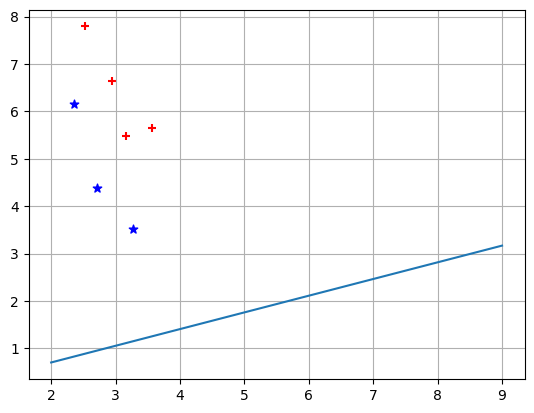

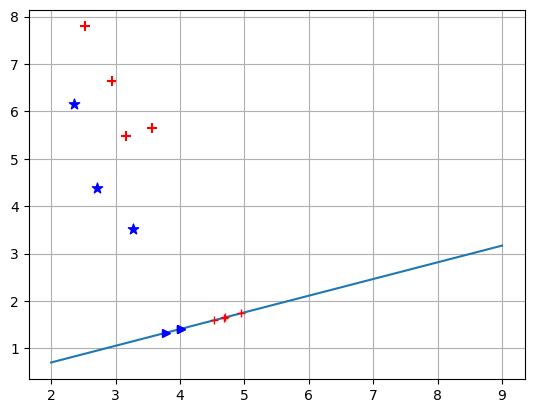

In [110]:
def TranLine(X,K,B):
    X_i = []
    Y_i = []
    for i in range(np.size(X,0)):
        y_0 = X[i,1]
        x_0 = X[i,0]
        x1 = (K*(y_0-B)+x_0)/(K**2+1)
        y1 = K*x1+B
        X_i.append(x1)
        Y_i.append(y1)
    return X_i,Y_i

b = 0
x = np.arange(2,10)
k = W[1]/W[0]
y=k*x+b
plt.plot(x,y)
plt.scatter(X1[:,0],X1[:,1],marker='+',color='r',s=40)
plt.scatter(X2[:,0],X2[:,1],marker='*',color='b',s=40)
plt.grid()
plt.show()
X_1,Y_1 = TranLine(X1,k,b)
X_2,Y_2 = TranLine(X2,k,b)
plt.plot(x,y)
plt.scatter(X1[:,0],X1[:,1],marker='+',color='r',s=60)
plt.scatter(X2[:,0],X2[:,1],marker='*',color='b',s=60)
plt.grid()
plt.plot(X_1,Y_1,'r+')
plt.plot(X_2,Y_2,'b>')